## An analysis on what factors can indicate whether someone is suffering from heart disease

import statements

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans as clustering

In [3]:
df = pd.read_csv("/users/kunalkapur/Downloads/heart.csv")

Data frame is 303 rows with 14 columms 

In [4]:
df.shape

(303, 14)

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


   ## Analyzing  givens

Text(0.5, 1.0, 'Age Distribution ')

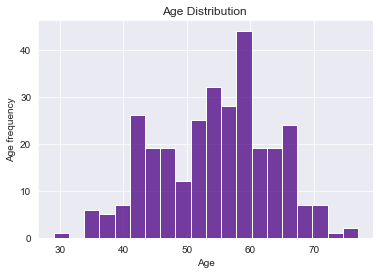

In [6]:
sns.set_style("darkgrid")
sns.histplot(df['age'],bins=20,color='indigo')

plt.xlabel('Age')
plt.ylabel('Age frequency')
plt.title("Age Distribution ")

The given histogram shows roughly a normal disrtubtion with a mean centered around 56. Let's analayze how the amount of men with heart conditions compare to females 

In [7]:
dfWomen = df[df['sex']==1]
dfMen = df[df['sex']==0]

print("Number of women in data set ", len(dfWomen))
print("Number of men in data set ", len(dfMen))

Number of women in data set  207
Number of men in data set  96


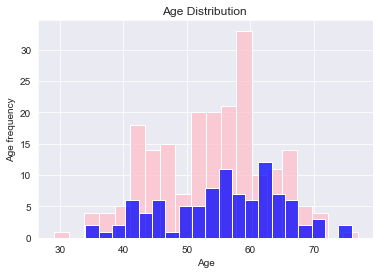

In [8]:
sns.set_style("darkgrid")
_ = sns.histplot(dfWomen['age'],bins=20,color='pink')
_ = sns.histplot(dfMen['age'],bins=20,color='blue')

_ = plt.xlabel('Age')
_ = plt.ylabel('Age frequency')
_ = plt.title("Age Distribution ")
plt.show()

In [9]:
def printStatInfo(info):
    print("Mean:",info['age'].mean())
    print("SD:",info['age'].std())
    
print("Women:")
printStatInfo(dfWomen)
print()
print("Men:")
printStatInfo(dfMen)

Women:
Mean: 53.75845410628019
SD: 8.883802951448502

Men:
Mean: 55.677083333333336
SD: 9.409395966593197


Though the quantity of women in the data set is lower, the distributions of ages between men and women are roughly the same. This would seem to indicate that gender doesn't have as much of a significant role in predicting whether a patient could be at risk for heart disease 

## Resting blood pressure and cholesteral

In [1]:
sc = plt.scatter(df['chol'],df['trestbps'])
sc = plt.xlabel("cholesteral")
sc = plt.ylabel("Resting BPM")

NameError: name 'plt' is not defined

There is some general positive correlation with cholesteral and resting BPM, howeve

In [11]:
pains = []
for i in range(4):
    pains.append(df[df['cp']==i])

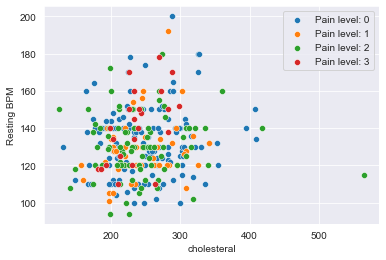

In [12]:

for i in pains:
    sc = sns.scatterplot(x=i['chol'],y=i['trestbps'],label = "Pain level: " +str(i['cp'].unique()[0]))
    plt.legend()
sc = plt.xlabel("cholesteral")
sc = plt.ylabel("Resting BPM")
plt.show()

When catagorizing by degree of pain, there seems to be no noticeable clusters for the type of pain someone has within the data. This means that there seems to be no relationship between the cholesteral levels and resting BPM to determine what chest pain someone may have

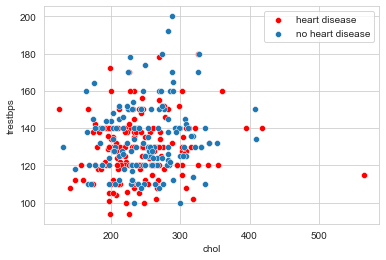

In [35]:
affected = df[df['target']==1]
unaffected = df[df['target']==0]
dis = sns.scatterplot(x=affected['chol'],y=affected['trestbps'],label="heart disease",color='red')
dis = sns.scatterplot(x=unaffected['chol'],y=unaffected['trestbps'],label = "no heart disease")
plt.legend()

<AxesSubplot:xlabel='chol', ylabel='Count'>

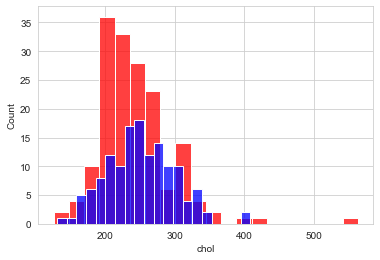

In [42]:
sns.histplot(affected['chol'],bins=20,color='red')
sns.histplot(unaffected['chol'],bins=20,color='blue')

<AxesSubplot:xlabel='trestbps', ylabel='Count'>

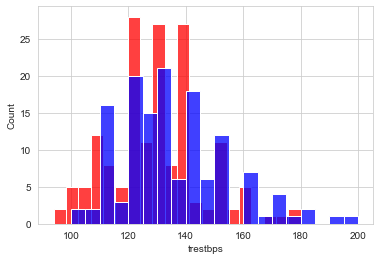

In [43]:
sns.histplot(affected['trestbps'],bins=20,color='red')
sns.histplot(unaffected['trestbps'],bins=20,color='blue')

Additionally, this scatter plot goes to show that there seems to be no speicfic grouping when it comes to comparing cholesteral and maximum heart rate in grouping patients who have heart disease

## Clustering 

Using k-means clustering isn't the best at grouping when it comes to discrete or catigorical variables as there is no such thing as a mean when it comes to grouping them. As a result we will isolate the data that contains only numerical values 

In [13]:
clustering_df = pd.DataFrame()

In [14]:
df


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [15]:
df.keys()

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [16]:
desired = ['chol','trestbps',]

In [17]:
clustering_df = df[desired]

In [18]:
clustering_df.head()

,chol,trestbps
0,233,145
1,250,130
2,204,130
3,236,120
4,354,120


Text(0, 0.5, 'Inertia')

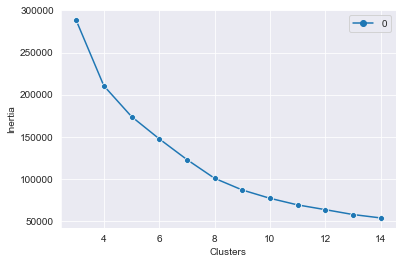

In [19]:
inertia  = []
for i in range(3,15):
    kmeans = clustering(n_clusters=i, random_state=0)
    kmeans.fit(clustering_df)
    inertia.append(kmeans.inertia_)
kmeans_df = pd.DataFrame(inertia,range(3,15))
sns.lineplot(data = kmeans_df,markers=True)
plt.xlabel("Clusters")
plt.ylabel("Inertia")


The inertia represents the sum of the square distances of each data point to their coressponding cluster. Using the elbow method we will try to identify which value of n (where n=the number of clusters) best represents the data, and in this case that value seems to be 8

In [20]:
clusters = []
kmeans = clustering(n_clusters=8, random_state=0)
kmeans.fit(clustering_df)
labels = kmeans.labels_
clusters = kmeans.cluster_centers_
labels

array([2, 0, 1, 0, 7, 5, 6, 0, 2, 5, 2, 0, 0, 1, 6, 1, 7, 2, 2, 2, 2, 2,
       2, 2, 1, 6, 2, 5, 4, 1, 1, 5, 1, 0, 1, 5, 7, 2, 6, 4, 7, 0, 1, 0,
       7, 7, 2, 0, 1, 2, 0, 7, 2, 5, 0, 1, 1, 0, 5, 7, 0, 7, 5, 1, 1, 5,
       1, 2, 1, 1, 0, 1, 1, 0, 1, 0, 0, 2, 1, 0, 0, 7, 7, 6, 0, 3, 0, 1,
       1, 0, 0, 1, 2, 7, 5, 2, 4, 1, 7, 0, 2, 6, 1, 0, 1, 1, 2, 2, 0, 0,
       6, 5, 7, 1, 0, 1, 1, 1, 1, 2, 7, 0, 0, 0, 1, 1, 1, 6, 1, 0, 2, 0,
       7, 1, 7, 0, 5, 1, 1, 0, 7, 7, 1, 1, 1, 2, 0, 2, 1, 5, 2, 5, 2, 6,
       2, 1, 0, 1, 1, 1, 0, 7, 5, 5, 5, 6, 1, 0, 0, 1, 0, 1, 0, 2, 1, 5,
       1, 7, 5, 6, 7, 2, 7, 1, 2, 7, 0, 0, 2, 5, 7, 1, 5, 6, 5, 6, 2, 0,
       0, 0, 1, 0, 6, 6, 5, 0, 0, 0, 5, 5, 2, 0, 1, 7, 0, 7, 0, 7, 0, 0,
       4, 2, 6, 6, 0, 5, 0, 1, 6, 7, 0, 6, 6, 0, 7, 7, 7, 6, 7, 0, 6, 2,
       2, 6, 5, 0, 4, 2, 6, 0, 7, 0, 7, 7, 6, 7, 0, 1, 2, 1, 2, 1, 0, 0,
       1, 1, 6, 5, 0, 0, 0, 2, 0, 1, 0, 1, 2, 0, 7, 5, 7, 1, 1, 2, 1, 7,
       1, 2, 7, 1, 2, 7, 2, 2, 5, 5, 1, 5, 2, 0, 5,

In [21]:
clusters_df = pd.DataFrame(clusters)
clusters_df

,0,1
0,258.689189,123.364865
1,210.788732,121.197183
2,229.800000,147.020000
3,564.000000,115.000000
4,397.400000,144.800000
5,171.411765,129.852941
6,287.115385,160.961538
7,313.690476,127.571429


In [22]:
sns.set_style("whitegrid")

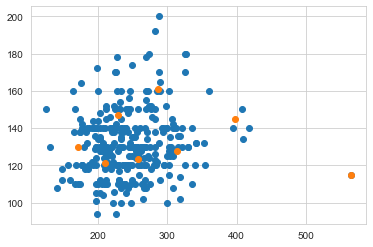

In [23]:
_ = plt.scatter(df['chol'],df['trestbps'])
_ = plt.scatter(clusters_df[0],clusters_df[1])

# Binary classification 

Let's see if we can indentify what patients are suffering from heart disease based on a binary calssification model 

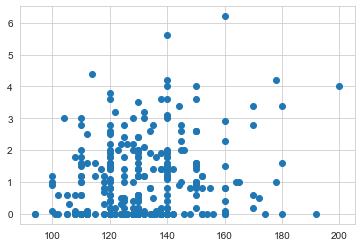

In [27]:
plt.scatter(df['trestbps'],df['oldpeak'])